<a href="https://colab.research.google.com/github/LueMar-R/P36_R_HousingPrices/blob/main/R_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction with R

## Environment setting

In [1]:

install.packages("shiny")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’




In [2]:
install.packages('randomForest')
install.packages('caret')
install.packages('corrplot')
install.packages('MLmetrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [3]:
library(tidyverse) # utility functions
library(rpart) # for regression trees
library(modelr)
library(randomForest) # for random Forests
library(shiny) # Vizualisation
library(corrplot) # for correlation matrix
library(caret) # for metrics

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


corrplot 0.90 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




## Data Preprocessing

#### Data loading and analysis

In [4]:
df <- read_csv("/content/sample_data/california_housing_train.csv")
summary(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  longitude = col_double(),
  latitude = col_double(),
  housing_median_age = col_double(),
  total_rooms = col_double(),
  total_bedrooms = col_double(),
  population = col_double(),
  households = col_double(),
  median_income = col_double(),
  median_house_value = col_double()
)




   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1462  
 Median :-118.5   Median :34.25   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.59      Mean   : 2644  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3151  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :37937  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  790   1st Qu.: 282.0   1st Qu.: 2.5664  
 Median : 434.0   Median : 1167   Median : 409.0   Median : 3.5446  
 Mean   : 539.4   Mean   : 1430   Mean   : 501.2   Mean   : 3.8836  
 3rd Qu.: 648.2   3rd Qu.: 1721   3rd Qu.: 605.2   3rd Qu.: 4.7670  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value
 Min.   : 1499

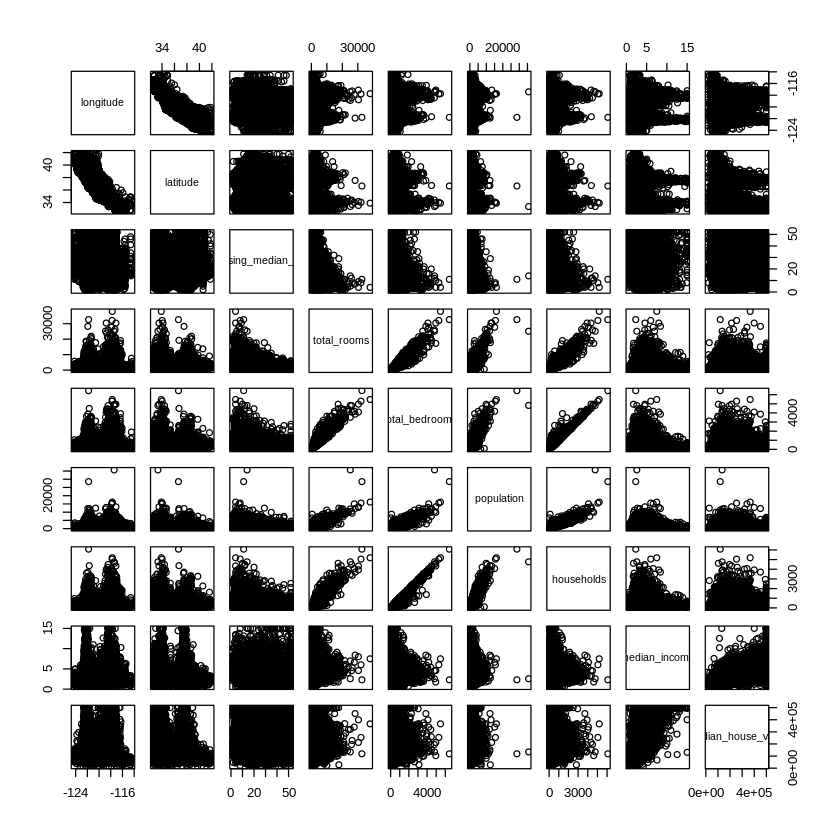

In [5]:
# pairplot
pairs(df)

In [6]:
# correlation matrix 
cor(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92520828,-0.1142503,0.04701044,0.07180196,0.1016742646,0.059627704,-0.0154849614,-0.04498170
latitude,-0.92520828,1.00000000,0.0164539,-0.03877257,-0.06937292,-0.1112613615,-0.074902297,-0.0803030138,-0.14491672
housing_median_age,-0.11425031,0.01645390,1.0000000,-0.36098417,-0.32043408,-0.2958898054,-0.302754191,-0.1159316246,0.10675771
total_rooms,0.04701044,-0.03877257,-0.3609842,1.00000000,0.92840299,0.8601703408,0.919018298,0.1953828074,0.13099147
total_bedrooms,0.07180196,-0.06937292,-0.3204341,0.92840299,1.00000000,0.8811685744,0.980920092,-0.0134946823,0.04578305
population,0.10167426,-0.11126136,-0.2958898,0.86017034,0.88116857,1.0000000000,0.909246530,-0.0006376291,-0.02785006
households,0.05962770,-0.07490230,-0.3027542,0.91901830,0.98092009,0.9092465299,1.000000000,0.0076437162,0.06103063
median_income,-0.01548496,-0.08030301,-0.1159316,0.19538281,-0.01349468,-0.0006376291,0.007643716,1.0000000000,0.69187060
median_house_value,-0.04498170,-0.14491672,0.1067577,0.13099147,0.04578305,-0.0278500611,0.061030634,0.6918706038,1.00000000


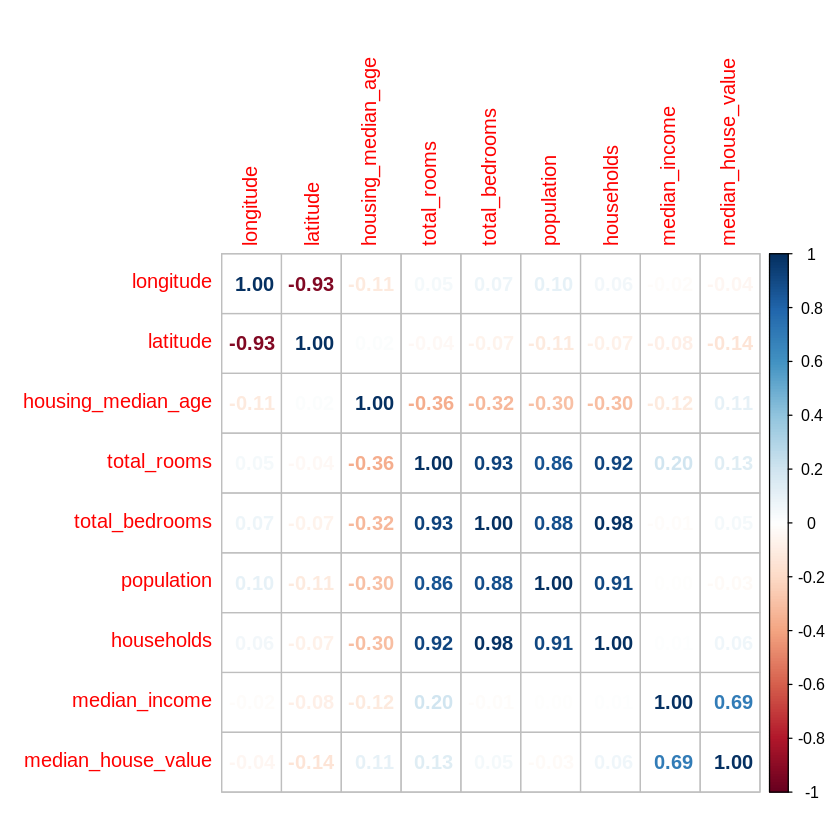

In [7]:
# correlation matrix with corrplot library
corrplot(cor(df), method = 'number')

#### Preprocessing

In [8]:
#missing data
sum(is.na(df)) 

#df <- na.omit(df)
# as there is no NA Values here, we don't need to execute this last command

[1] 0

In [9]:
#train test split

set.seed(42)
df=df[sample(nrow(df)),]
select.data= sample (1:nrow(df), 0.7*nrow(df))
train.data= df[select.data,]
test.data= df[-select.data,]

print("Number of sample in train and test sets :")
print(nrow(train.data))
print(nrow(test.data))

[1] "Number of sample in train and test sets :"
[1] 11900
[1] 5100


## Training

### Decision Tree Regressor

In [10]:
#  decision tree
fit <- rpart(median_house_value ~ longitude + latitude + housing_median_age + total_rooms +
             total_bedrooms + population + households + median_income, data = train.data)

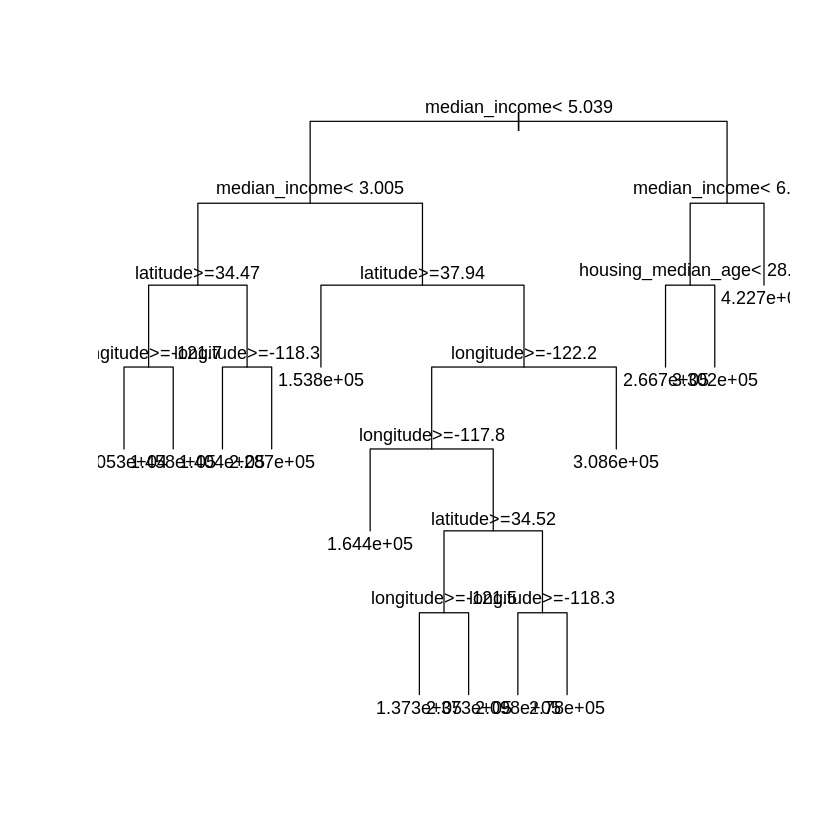

In [11]:
# plot tree 
plot(fit, uniform=TRUE)

text(fit, cex=.9)

In [12]:
print("Predictions of the decision tree for the five first houses :")
print(predict(fit, head(test.data[-9])))

print("Actual prices")
print(head(test.data$median_house_value))

[1] "Predictions of the decision tree for the five first houses :"
        1         2         3         4         5         6 
 90532.36 278017.41 153839.21 237252.33 422703.08 308595.10 
[1] "Actual prices"
[1]  40900 225200  98900 220800 406700 500001


In [13]:
print("Metrics")
y_p1 = predict(fit, test.data[-9])

res1 <-postResample(pred = y_p1, obs = test.data$median_house_value)
print(res1)

[1] "Metrics"
        RMSE     Rsquared          MAE 
7.635315e+04 5.702031e-01 5.635402e+04 


### Random Forest Classifier

In [14]:
#To perform Random Forest Operation
classifier= randomForest(x=train.data[-9],y=train.data$median_house_value,ntree = 10)

y_pred=predict(classifier, newdata = test.data[-9])
print("Predictions of the random forest for the five first houses :")
print(head(y_pred))
print("Actual price")
print(head(test.data$median_house_value))

[1] "Predictions of the random forest for the five first houses :"
        1         2         3         4         5         6 
 53882.33 217434.85 135866.17 207036.50 312078.00 340180.40 
[1] "Actual price"
[1]  40900 225200  98900 220800 406700 500001


In [15]:
print("Metrics")
res <-postResample(pred = y_pred, obs = test.data$median_house_value)
print(res)

[1] "Metrics"
        RMSE     Rsquared          MAE 
5.628661e+04 7.695189e-01 3.859095e+04 


## Visualization interface with Shiny

In [16]:
library(shiny)

# Define UI for app that draws a histogram ----
ui <- fluidPage(

  # App title ----
  titlePanel("Hello Shiny!"),

  # Sidebar layout with input and output definitions ----
  sidebarLayout(

    # Sidebar panel for inputs ----
    sidebarPanel(

      # Input: Slider for the number of bins ----
      sliderInput(inputId = "bins",
                  label = "Number of bins:",
                  min = 1,
                  max = 50,
                  value = 30)

    ),

    # Main panel for displaying outputs ----
    mainPanel(

      # Output: Histogram ----
      plotOutput(outputId = "distPlot")

    )
  )
)

In [17]:
# Define server logic required to draw a histogram ----
server <- function(input, output) {

  # Histogram of the Old Faithful Geyser Data ----
  # with requested number of bins
  # This expression that generates a histogram is wrapped in a call
  # to renderPlot to indicate that:
  #
  # 1. It is "reactive" and therefore should be automatically
  #    re-executed when inputs (input$bins) change
  # 2. Its output type is a plot
  output$distPlot <- renderPlot({

    x    <- faithful$waiting
    bins <- seq(min(x), max(x), length.out = input$bins + 1)

    hist(x, breaks = bins, col = "#75AADB", border = "white",
         xlab = "Waiting time to next eruption (in mins)",
         main = "Histogram of waiting times")

    })

}

In [18]:
myapp = shinyApp(ui = ui, server = server)

In [ ]:
runApp(myapp)


Listening on http://127.0.0.1:7312

